# --> Supervised learning project <--

## 1. Extracción, tratamiento y limpieza de los datos

    1. Eleccion del dataset:

 - https://archive.ics.uci.edu/ml/datasets/Wine+Quality
 - Dos dataset, uno de vinos tintos y otro de vinos blancos
 - En principio voy a trabajar con los dos por separado

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
white_wine = pd.read_csv ('../winequality-white.csv', sep = ';')

In [3]:
red_wine = pd.read_csv ('../winequality-red.csv', sep = ';')

    2. Inspeccionar los dataset y prepararlo para poder aplicar los algoritmos de machine learning

In [4]:
display(white_wine.shape)
display(white_wine.dtypes)
display(white_wine.isnull().sum())
display(white_wine.head())

(4898, 12)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
display(red_wine.shape)

(1599, 12)

 -  Ambos datasets tienen las mismas columnas, no tienen nulos, todos sus datos son de tipo numérico. La única diferencia entre ambos es que el data set de white wines tiene mas registros que el de red wines.
 
 - Voy a juntar ambos data set, añadiendo una columna mas, "tipo", que tendrá dos categorías, 'red' y 'white' que usaré como una feature mas. 
 
 - Voy a convertir la columna quality en object ya que va a ser la que voy a utilizar como clasificador, con labels del 1 al 10, y va a ser el valor que voy a tratar de predecir a partir del resto de datos numéricos. 

In [6]:
white_wine['type'] = 'white'
red_wine['type'] = 'red'

In [7]:
wines = pd.concat([white_wine,red_wine], ignore_index=True)
display(wines.shape)
display(wines.head())

(6497, 13)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [8]:
wines['quality'] = wines['quality'].astype(str)   # convertir en categoria

wines['quality'].value_counts()     # Multilabel, 7 categorias

# de la calificacion mas baja (3),y las mas alta(9),hay pocos valores,en principio van a ser dificiles de predecir.
# Los datos no estan balanceados, quizás lo mejor sería agruparlos en bins: 9,8,7 (bueno); 6(normal); 5,4,3 (regular)
# de momento no voy a dividirlos, voy a entrenar asi el modelo para ver que resultados obtengo

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [9]:
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


In [10]:
wines.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

    3. Separar dataset de features y dataset de labels

In [11]:
X = wines[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol','type']]

y = wines['quality']

In [12]:
# paso a dummies para tener todas las categorias numéricas

X = pd.get_dummies(data=X)
y = pd.get_dummies(data=y)

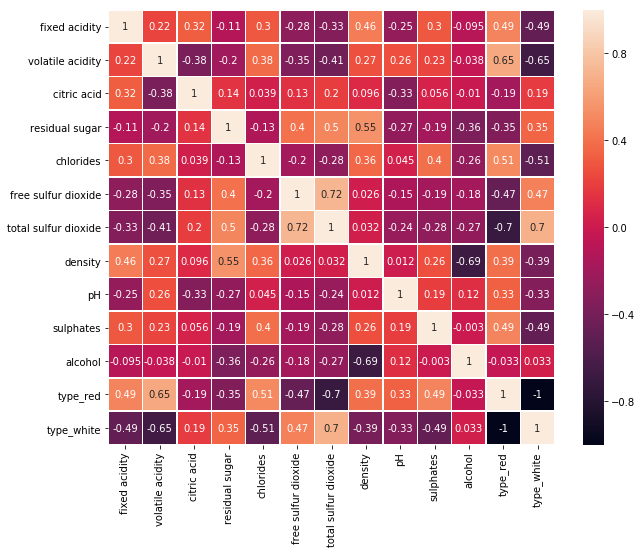

In [13]:
X_matrix_corr = X.corr()

fig, ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(X_matrix_corr, annot= True, linewidths=.5)

# No hay ninguna feature con una correlacion muy alta. Por lo tanto dejo todas

Text(0.5, 1.0, 'alcohol')

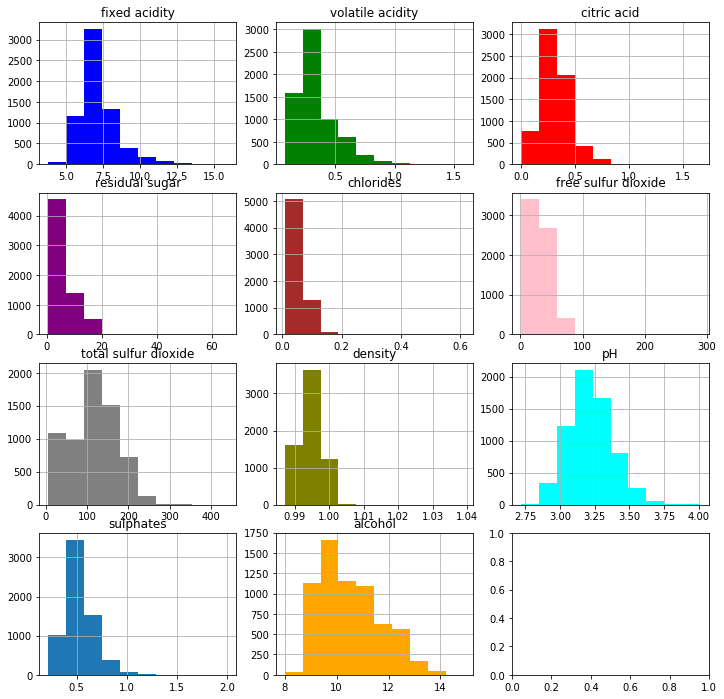

In [14]:
# Histogramas para ver la distribucion de las features numéricas

f, axs = plt.subplots(4,3,figsize=(12,12))

plt.subplot(4, 3, 1)
wines['fixed acidity'].hist(color = 'blue')
plt.title('fixed acidity')

plt.subplot(4, 3, 2)
wines['volatile acidity'].hist(color = 'green')
plt.title('volatile acidity')

plt.subplot(4, 3, 3)
wines['citric acid'].hist(color = 'red')
plt.title('citric acid')

plt.subplot(4, 3, 4)
wines['residual sugar'].hist(color = 'purple')
plt.title('residual sugar')

plt.subplot(4, 3, 5)
wines['chlorides'].hist(color = 'brown')
plt.title('chlorides')

plt.subplot(4, 3, 6)
wines['free sulfur dioxide'].hist(color = 'pink')
plt.title('free sulfur dioxide')

plt.subplot(4, 3, 7)
wines['total sulfur dioxide'].hist(color = 'gray')
plt.title('total sulfur dioxide')

plt.subplot(4, 3, 8)
wines['density'].hist(color = 'olive')
plt.title('density')

plt.subplot(4, 3, 9)
wines['pH'].hist(color = 'cyan')
plt.title('pH')

plt.subplot(4, 3, 10)
wines['sulphates'].hist()
plt.title('sulphates')

plt.subplot(4, 3, 11)
wines['alcohol'].hist(color = 'orange')
plt.title('alcohol')


    4. Separar el dataset en dos partes, una para entrenar el modelo y otro para testarlo. 80% para entrenar, 
        20% para testear

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5197, 13) (1300, 13) (5197, 7) (1300, 7)


## 2. Búsqueda de un modelo que se ajuste lo mejor posible a los datos

Probaré los modelos aplicando la técnica de cross validatión en vez de utilizar directamente los sub datasets de train creados en el paso anterior. Una vez elegido el modelo, lo entrenaré con estos datasets train. 

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [17]:
# Regresión logistica: 

#For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss; 
#‘liblinear’ is limited to one-versus-rest schemes.

cls_log = OneVsRestClassifier(LogisticRegression(multi_class='multinomial', solver='newton-cg')) # otros solver mas o menos

scores = cross_val_score(cls_log, X_train, y_train, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.28076923 0.26730769 0.24735322 0.27718961 0.22425409]
Accuracy: 0.26 (+/- 0.04)


In [18]:
# Super vector machine - SVC

cls_SVC = OneVsRestClassifier(SVC(gamma = 'auto'))

scores = cross_val_score(cls_SVC, X_train, y_train, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.3625     0.37211538 0.36766121 0.36188643 0.35514918]
Accuracy: 0.36 (+/- 0.01)


In [19]:
# Random forest

cls_forest = OneVsRestClassifier(RandomForestClassifier(n_estimators=40))
scores = cross_val_score(cls_forest, X_train, y_train, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.51538462 0.52788462 0.54379211 0.52646776 0.53031761]
Accuracy: 0.53 (+/- 0.02)


In [20]:
# K-nearest neightbours

cls_knn = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=3))
scores = cross_val_score(cls_knn, X_train, y_train, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.45384615 0.45769231 0.42444658 0.43503369 0.42733397]
Accuracy: 0.44 (+/- 0.03)


De los 4 modelos probados, y testados mediante cross validation, me voy a quedar con random forest y con k-near dado que son los que presentan un mayor valor de accuracy. A continuación:
 - Los entrenaré con X_train y y_train
 - Evaluaré los dos modelos mediante:
     - Balanced Accuracy Score
     - Precision vs. Recall
     - ROC curve
     - Confusion matrix

In [21]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.utils.multiclass import unique_labels
from sklearn.preprocessing import label_binarize
from scipy import interp
from itertools import cycle

# Random forest

In [22]:
# Primero entreno el modelo, y hago las predicciones con el dataset test. 
# Balanced accuracy score, precision and recall

cls_forest.fit (X_train, y_train)
predictions_forest = cls_forest.predict(X_test).argmax(axis=1)
actual_values = y_test.values.argmax(axis=1)

score_forest = balanced_accuracy_score(actual_values, predictions_forest)
precision_recall_fscore_support(actual_values, predictions_forest, average=None)
precision = precision_score(actual_values, predictions_forest, average=None)
recall = recall_score(actual_values, predictions_forest,average=None)

print("Score: %0.2f para el modelo random forest" % (score_forest))
print(precision)
print(recall)

Score: 0.35 para el modelo random forest
[0.         1.         0.78947368 0.73662551 0.85046729 1.        ]
[0.         0.13043478 0.67857143 0.61830743 0.41176471 0.25      ]


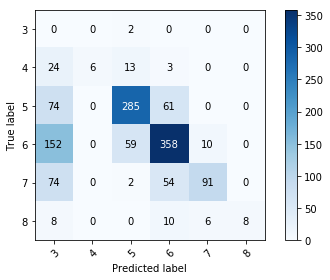

In [23]:
# confusion matrix

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):

    cm = confusion_matrix(y_true, y_pred)
    
    classes = classes[unique_labels(y_true, y_pred)]
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

plot_confusion_matrix(actual_values, predictions_forest, y.columns)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/ranking.py:656: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


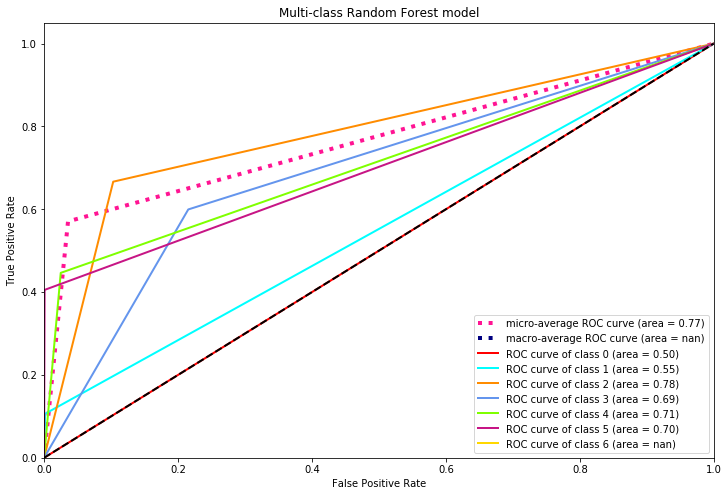

In [28]:
# ROC curve --> codigo de la documentacion

y2 = label_binarize(y, classes=[0, 1, 2, 3, 4, 5, 6])
n_classes = 7

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y2, test_size=.2, random_state=0)

y_score = cls_forest.fit(X_train2, y_train2).predict(X_test2)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test2[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test2.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize = (12,8))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['red','aqua', 'darkorange', 'cornflowerblue','chartreuse','mediumvioletred','gold'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class Random Forest model')
plt.legend(loc="lower right")
plt.show()

# K-nearest neightbours

In [25]:
# Primero entreno el modelo, y hago las predicciones con el dataset test. 
# Balanced accuracy score, precision and recall

cls_knn.fit (X_train, y_train)
predictions_knn = cls_knn.predict(X_test).argmax(axis=1)
actual_values = y_test.values.argmax(axis=1)

score_knn = balanced_accuracy_score(actual_values, predictions_knn)
precision_recall_fscore_support(actual_values, predictions_knn, average=None)
precision = precision_score(actual_values, predictions_knn, average=None)
recall = recall_score(actual_values, predictions_knn,average=None)

print("Score: %0.2f para el modelo K-nearest" % (score_forest))
print(precision)
print(recall)

Score: 0.35 para el modelo K-nearest
[0.00595238 0.2        0.53229974 0.56363636 0.45882353 0.26666667]
[0.5        0.04347826 0.49047619 0.53540587 0.35294118 0.125     ]


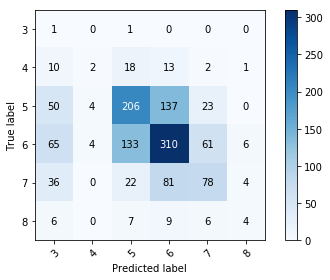

In [26]:
# confusion matrix

plot_confusion_matrix(actual_values, predictions_knn, y_train.columns)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/ranking.py:656: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


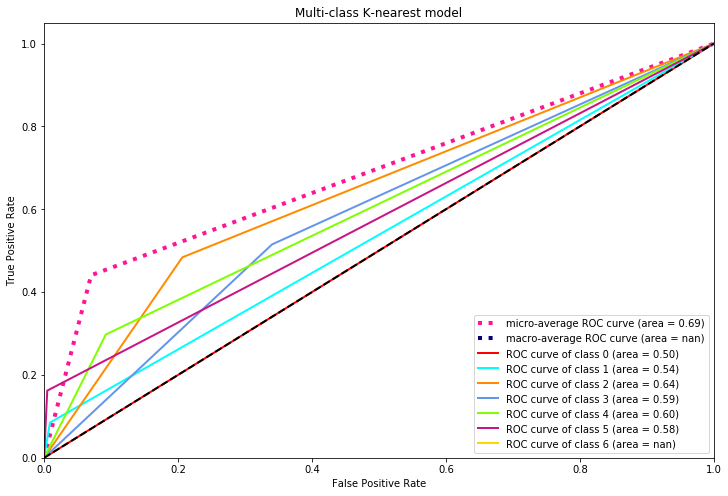

In [29]:
# ROC curve --> codigo de la documentacion

y_score = cls_knn.fit(X_train2, y_train2).predict(X_test2)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test2[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test2.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize = (12,8))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['red','aqua', 'darkorange', 'cornflowerblue','chartreuse','mediumvioletred','gold'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class K-nearest model')
plt.legend(loc="lower right")
plt.show()

# CONCLUSIONES:

El mejor modelo predictivo para esta base de datos sería el modelo con el algoritmo tipo 'RANDOM FOREST'. Ninguno de los dos modelos probados son capaces de predecir casos con unas calificaciones de 9 y 3 debido a que hay muy pocos casos en nuestro dataset. Sería interesante probar a agrupar las calificaciones en bins, y predecir en base a un menor número de clases, debido a la baja aparición de las clases con puntuacion 3 y 9.

También me gustaria haber probado a realizar las predicciones sin convertir la columna quality a objeto, quizás eso ha sido un error y las predicciones hubieran sido mejores con la columna como números enteros. 

